# Stage 2 - Data Pre-processing & Features Engineering
---

Kelompok 2:

*   Oei, Gabrielle Maureen B.S
*   Ummi Sarah
*   Arini Arumsari
*   Althaaf Athaayaa Daffa Qushayyizidane
*   Ruslan Hadi
*   Muhammad Ikhsan Hendriyana
*   Taufik Ismail
*   Jackson
*   Tsany Sutia

In [1]:
# Melakukan import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import uniform, boxcox
from scipy.stats.mstats import winsorize
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import gdown

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  2.0.2
seaborn version :  0.12.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
# Melakukan import csv
df = pd.read_csv("train.csv")
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
136606,136607,Male,21,1,2.0,0,< 1 Year,Yes,31207.0,152.0,108,0
105103,105104,Female,24,1,29.0,1,< 1 Year,No,27883.0,152.0,253,0
280050,280051,Female,57,1,9.0,0,1-2 Year,Yes,40955.0,124.0,174,0
358994,358995,Female,23,1,16.0,1,< 1 Year,No,21096.0,152.0,282,0
286718,286719,Male,21,1,25.0,0,< 1 Year,Yes,20911.0,160.0,237,0


In [4]:
# Pengelompokan kolom berdasarkan jenisnya
nums = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
nums = df.select_dtypes(include=nums)
nums.drop(columns=['id'],inplace=True)
nums = nums.columns
cats = ['Gender','Vehicle_Age','Vehicle_Damage']

# Data Cleansing (50 poin)

## Missing Value

In [5]:
# Melihat jumlah baris dan kolom
test = df.shape[0]

# Mengecek missing value ditiap fitur
missing_values_count = df.isnull().sum()
missing_values_count

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Setelah dilakukan pengecekan terhadap NULL/NaN values, tidak terdapat NULL/NaN pada dataset.

## Duplicated data


In [6]:
df.duplicated().sum()

0

In [7]:
df.duplicated(subset=['id'],keep=False).sum()

0

Setelah dilakukan pengecekan terhadap duplicated values, tidak terdapat data duplikasi pada dataset.

## Outliers

Dari grafik yang kita keluarkan ketika EDA yang telah dilakukan di Stage 1, kita tahu `Annual Premium` memiliki outliers yang cukup extreme sehingga ditangani dengan penghapusan IQR ataupun capping.

In [8]:
# membuat function untuk mencari IQR
d = df.shape[0]
a = ['Annual_Premium']
def find_limit(df, variables) :
    q1 = df[variables].quantile(0.25)
    q3 = df[variables].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    return lower_limit, upper_limit

In [9]:
# Membuang value outliers
df_clean = df.copy()

for i in a :
    lower, upper = find_limit(df_clean, i)
    df_clean = df_clean[~((df_clean[i] < lower) | (df_clean[i] > upper))]

df_clean = df_clean.reset_index(drop = True)

print(f'Jumlah baris sebelum memfilter outlier: {d}')
print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')
print(f'Sebanyak {d-len(df_clean)} rows dihapuskan atau {round(((d-len(df_clean))/d)*100,2)} %')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789
Sebanyak 10320 rows dihapuskan atau 2.71 %


In [10]:
# Capping : Mengubah outlier value menjadi upper (atau) lower
df_cap = df.copy()

for i in a :
    lower, upper = find_limit(df_cap, i)
    df_cap.loc[(df_cap[i] > upper), i] = upper
    df_cap.loc[(df_cap[i] < lower), i] = lower

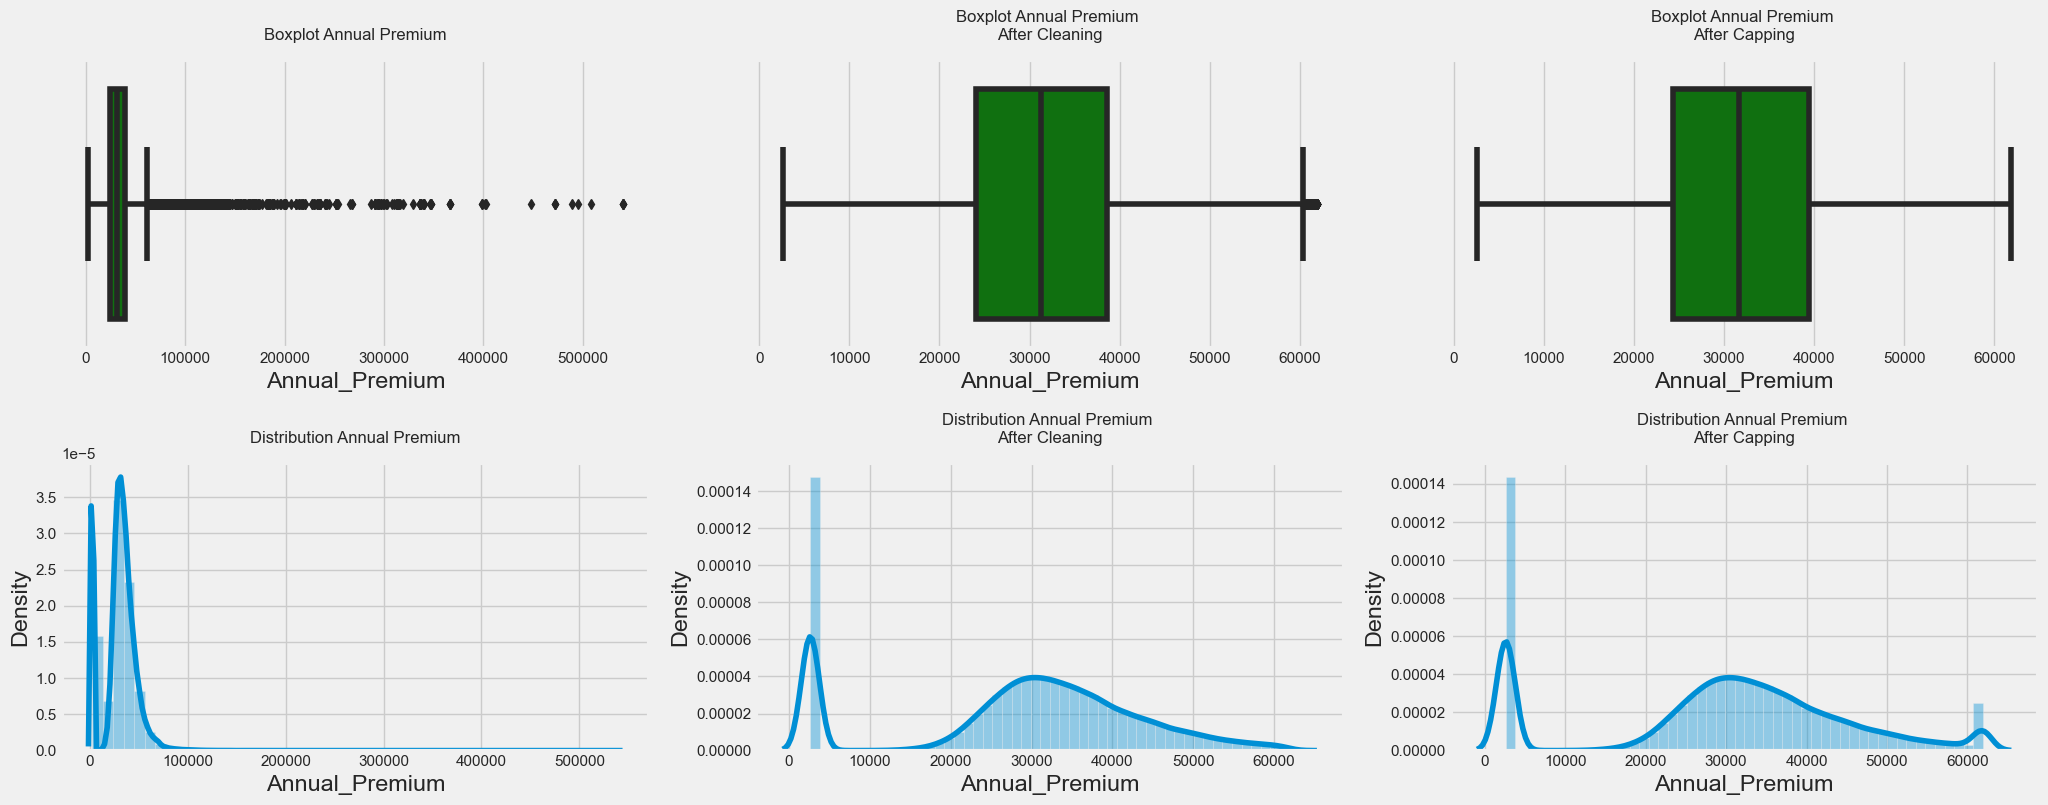

In [11]:
fig, ax = plt.subplots(2,3)

sns.boxplot(x=df['Annual_Premium'], color='green',orient='h',ax=ax[0,0])
ax[0,0].set_title('Boxplot Annual Premium', fontsize=12, pad=15, ha='center')
sns.distplot(df['Annual_Premium'], kde=True,ax=ax[1,0])
ax[1,0].set_title('Distribution Annual Premium', fontsize=12, pad=15, ha='center')

sns.boxplot(x=df_clean['Annual_Premium'], color='green',orient='h',ax=ax[0,1])
ax[0,1].set_title('Boxplot Annual Premium \nAfter Cleaning', fontsize=12, pad=15, ha='center')
sns.distplot(df_clean['Annual_Premium'], kde=True,ax=ax[1,1])
ax[1,1].set_title('Distribution Annual Premium \nAfter Cleaning', fontsize=12, pad=15, ha='center')

sns.boxplot(x=df_cap['Annual_Premium'], color='green',orient='h',ax=ax[0,2])
ax[0,2].set_title('Boxplot Annual Premium \nAfter Capping', fontsize=12, pad=15, ha='center')
sns.distplot(df_cap['Annual_Premium'], kde=True,ax=ax[1,2])
ax[1,2].set_title('Distribution Annual Premium \nAfter Capping', fontsize=12, pad=15, ha='center')

plt.tight_layout()

Diputuskan untuk menggunakan metode `IQR` untuk menangani outliers.

## Feature encoding

Mengubah `Vehicle_Damage` ke integer dalam = 0: Kendaraan customer belum pernah rusak, 1: Kendaraan customer sudah pernah rusak, serta `Vehicle_Age` dam 0: < 1 Year, 1: 1-2 Years, 2: > 2 Years. Melakukan konversi ke angka mulai dari 0 untuk memudahkan kerja machine learning. Mengubah kolom dengan datatype bool ke int agar lebih mudah diproses oleh model.

In [12]:
mapping_damage = {'Yes' : 1, 'No' : 0}
df_clean['Vehicle_Damage'] = df_clean['Vehicle_Damage'].map(mapping_damage)


In [13]:
mapping_age = {'> 2 Years' : 2, '1-2 Year' : 1, '< 1 Year' : 0}
df_clean['Vehicle_Age'] = df_clean['Vehicle_Age'].map(mapping_age)

In [14]:
df_clean.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1,0,33536.0,26.0,183,0


## Feature Transformation

Data memiliki karakteristik mayoritas sudah berbentuk Gaussian namun ada beberapa yang masih belum tersebar normal.

In [15]:
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df_clean.select_dtypes(include=num)
num.drop(columns=['id','Previously_Insured','Driving_License','Region_Code','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel','Response'],inplace=True)
num = num.columns

In [16]:
# Melakukan Standardization menggunakan RobustScaler()
df_clean['std_'+num] = RobustScaler().fit_transform(df_clean[num])

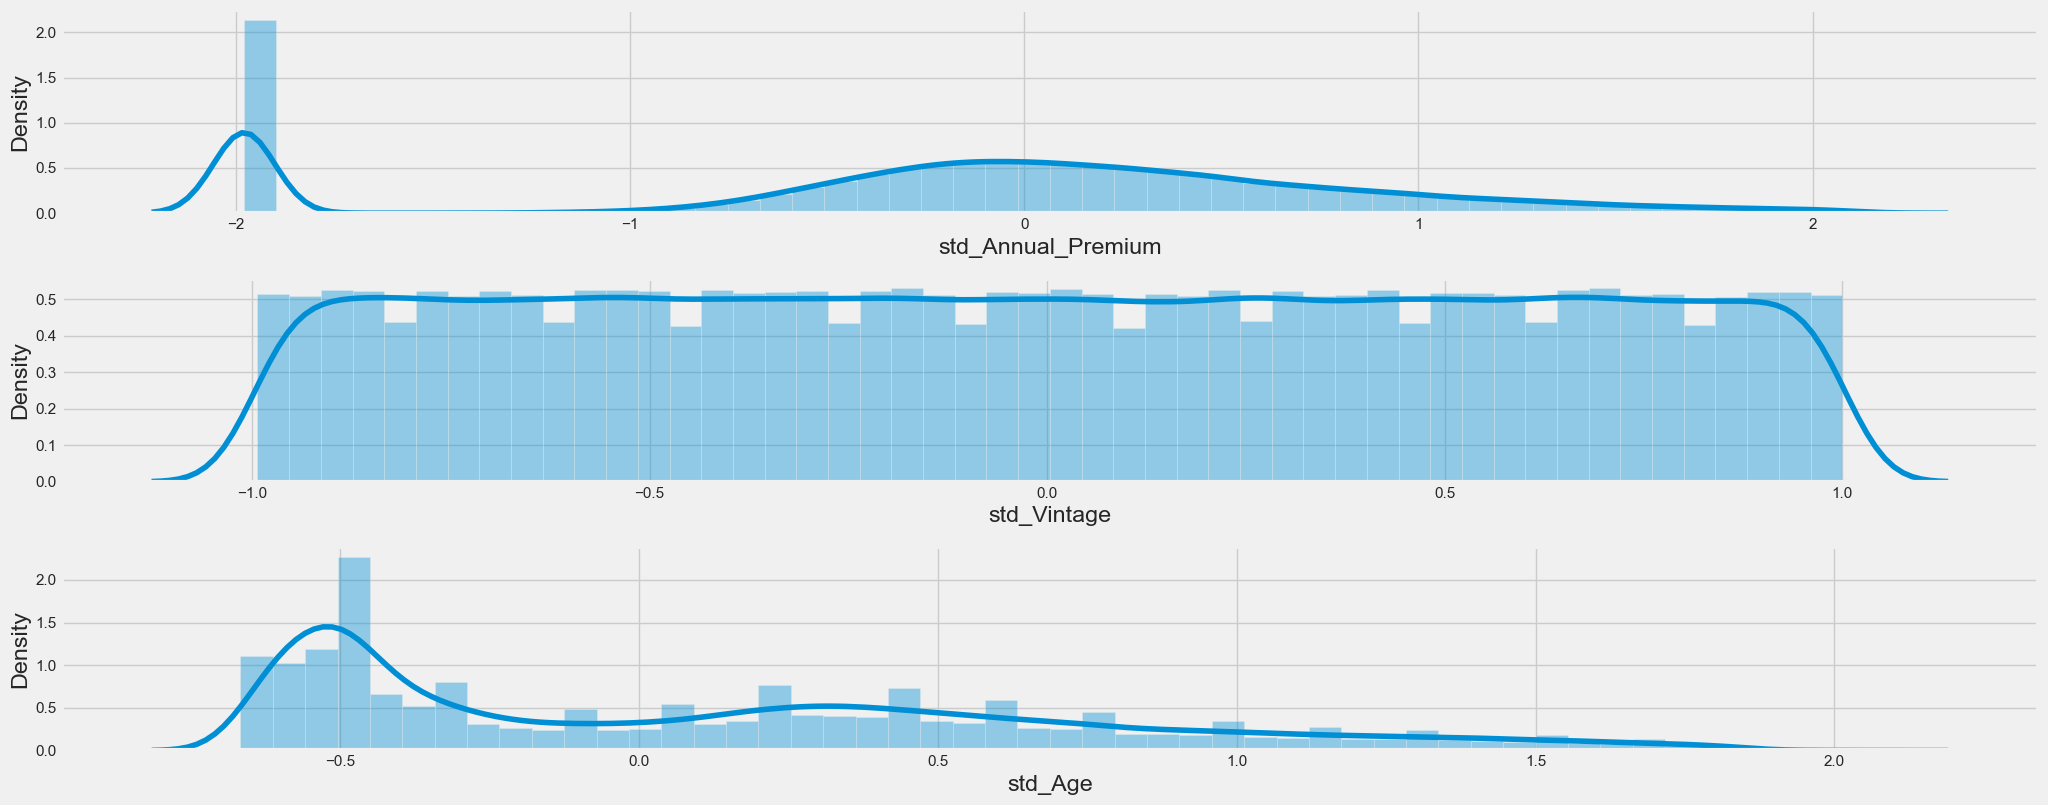

In [17]:
nums_std = ['std_Annual_Premium', 'std_Vintage', 'std_Age']

k = int((len(nums_std)+2)/3)

for i in range(0, len(nums_std)):
    plt.subplot(3, k, i+1)
    sns.distplot(df_clean[nums_std[i]], kde=True)
    plt.tight_layout()

In [18]:
# Melakukan Normalization menggunakan MinMaxScaler()
for i in num:
    df_clean['nml_'+i] = MinMaxScaler().fit_transform(df_clean[i].values.reshape(len(df_clean[i]),1))

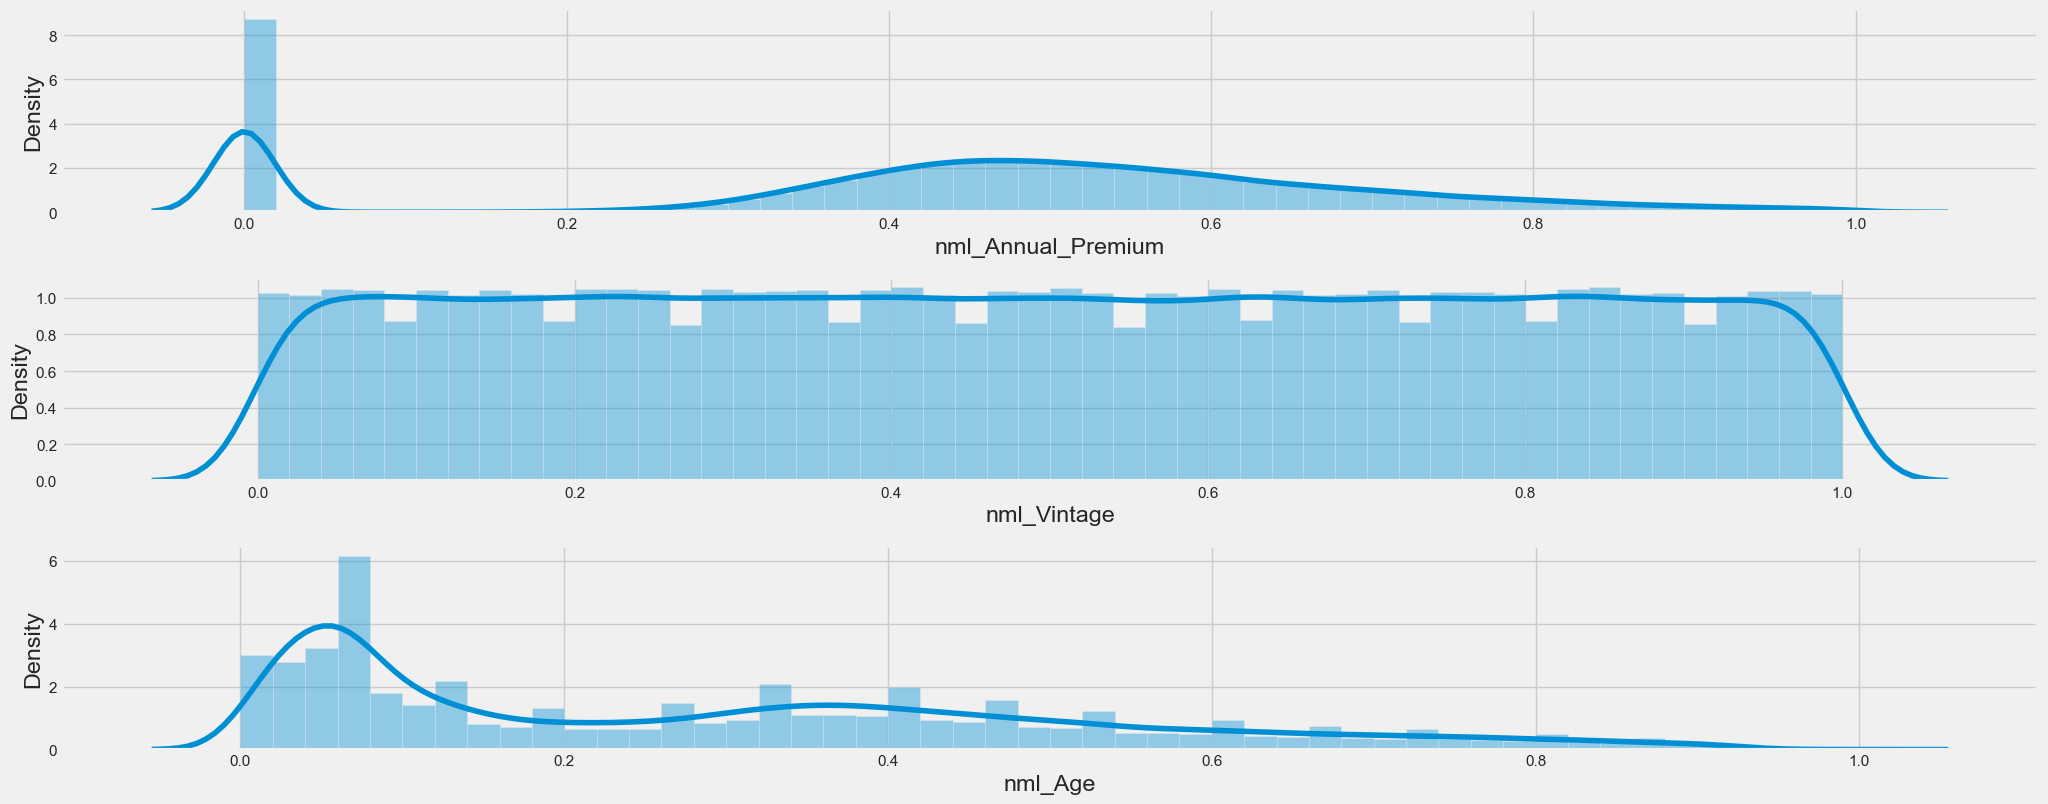

In [19]:
nums_nml = ['nml_Annual_Premium', 'nml_Vintage', 'nml_Age']

k = int((len(nums_nml)+2)/3)
for i in range(0, len(nums_nml)):
    plt.subplot(3, k, i+1)
    sns.distplot(df_clean[nums_nml[i]], kde=True)
    plt.tight_layout()

In [20]:
# Melakukan Standardization menggunakan Boxcox()
for i in num:
    df_clean['nml1_'+i],_ = boxcox(df_clean[i]+1)

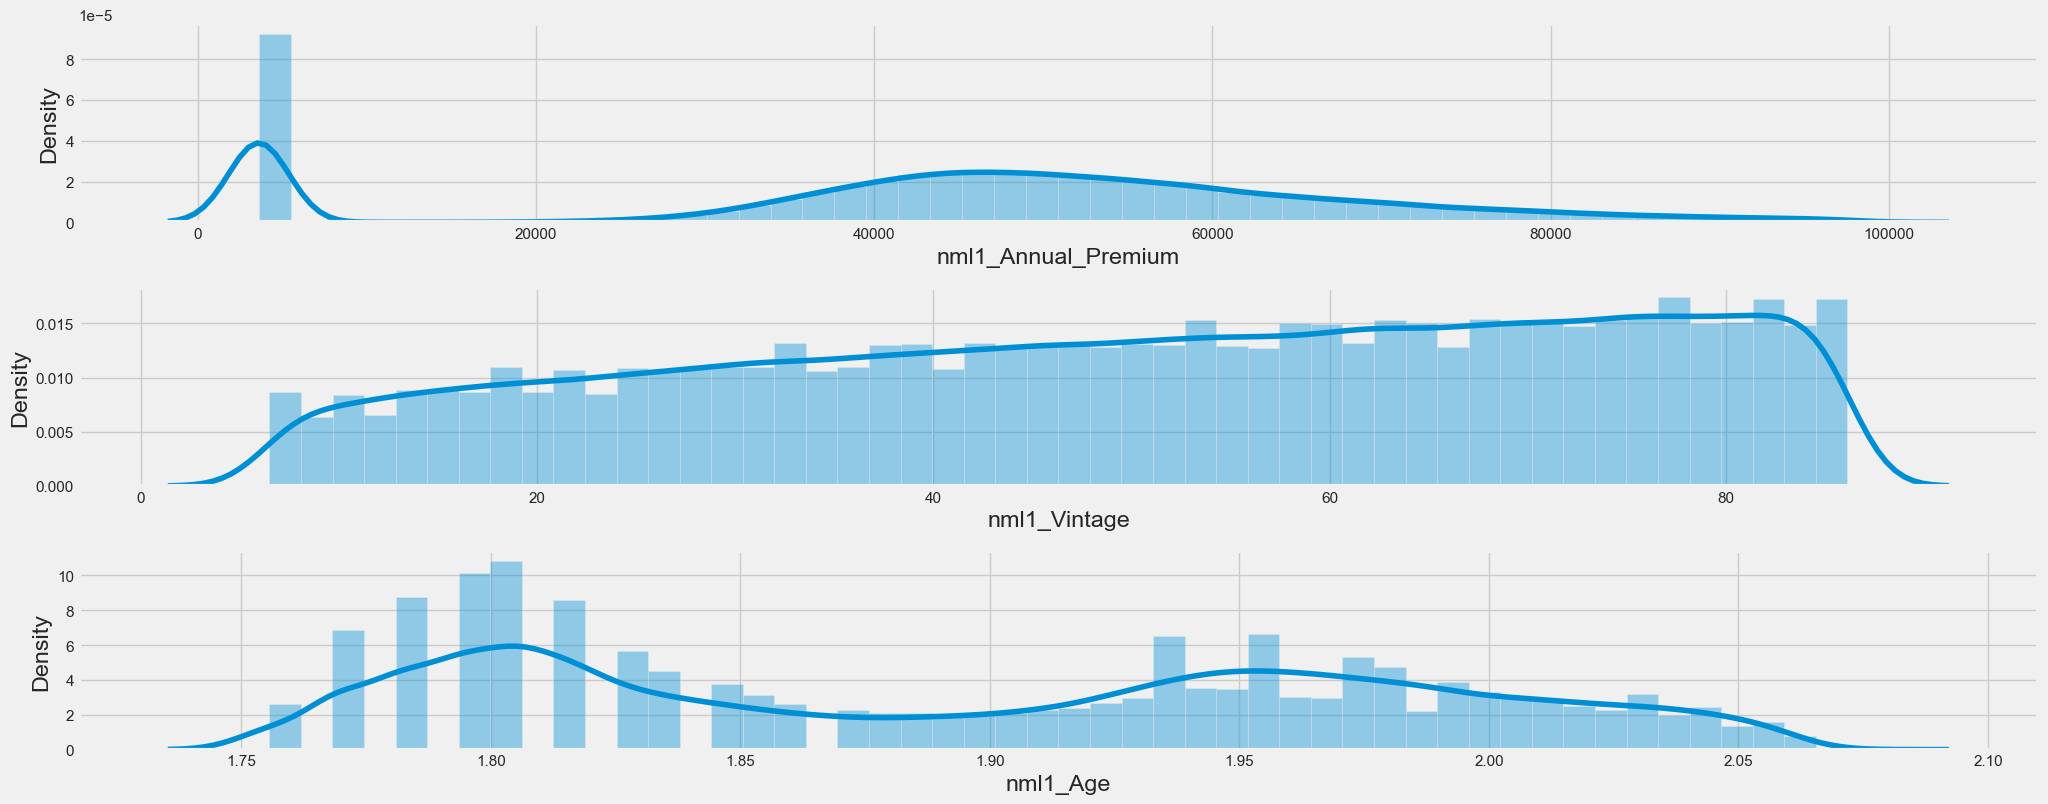

In [21]:
nums_nml1 = ['nml1_Annual_Premium', 'nml1_Vintage', 'nml1_Age']
 
k = int((len(nums_nml1)+2)/3)
for i in range(0, len(nums_nml1)):
    plt.subplot(3, k, i+1)
    sns.distplot(df_clean[nums_nml1[i]], kde=True)
    plt.tight_layout()

Diputuskan menggunakan `boxcox` dimana sebaran cenderung lebih normal.

## Class Imbalance

In [22]:
# Melihat berapa dejarat ketimpangan pada class

for i in range(len(df_clean['Response'].value_counts())):
    a = round(df_clean['Response'].value_counts()[i]/df_clean.shape[0]*100,2)
    print(f'{a}%')

print('Degree of Imbalance dari data ini termasuk pada Moderate Imbalance')

87.82%
12.18%
Degree of Imbalance dari data ini termasuk pada Moderate Imbalance


In [23]:
# Membuat kolom baru untuk melihat Class 'Yes'

df_clean['Res_class'] = df_clean['Response']==1
df_clean['Res_class'].value_counts()

Res_class
False    325634
True      45155
Name: count, dtype: int64

In [24]:
# Memisahkan dataframe dengan Response dan Res_class dan hanya Res_class
X = df_clean[[col for col in df_clean.columns if (str(df_clean[col].dtype) != 'object') and col not in ['Response', 'Res_class']]]
y = df_clean['Res_class'].values
print(X.shape)
print(y.shape)

(370789, 19)
(370789,)


In [25]:
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=1/5, random_state=42).fit_resample(X, y)

In [26]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    325634
True      45155
Name: count, dtype: int64


OVERSAMPLING
SMOTE
False    325634
True      65126
Name: count, dtype: int64


In [27]:
X_over_SMOTE['Response'] = y_over_SMOTE.astype(int)
df = X_over_SMOTE.copy()

# Feature Engineering

## Feature Selection

## Feature Extraction

## 4 New Features